# Handling missing value (Missing Indicator/ Random Sample Imputation)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
X= df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_train.head()

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [11]:
# For training data
# Count how many null values we need to fill in X_train['Age_imputed']
null_count_train = X_train['Age_imputed'].isnull().sum()
# Sample exactly that many values from non-null ages
sampled_values_train = X_train['Age'].dropna().sample(null_count_train, replace=True).values
# Assign these values to the null positions
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = sampled_values_train

# For test data
# Count how many null values we need to fill in X_test['Age_imputed']
null_count_test = X_test['Age_imputed'].isnull().sum()
# Sample exactly that many values from non-null ages in training data
sampled_values_test = X_train['Age'].dropna().sample(null_count_test, replace=True).values
# Assign these values to the null positions
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = sampled_values_test

In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([33.  , 20.  , 18.  , 35.  , 18.  , 29.  , 38.  , 19.  , 22.  ,
        0.75, 35.  , 54.  , 42.  , 15.  , 19.  , 24.  , 11.  , 11.  ,
       28.  , 18.  ,  2.  , 25.  , 24.  ,  1.  , 19.  , 41.  , 26.  ,
       42.  , 30.  , 45.  , 31.  , 24.  , 42.  , 42.  , 24.  , 25.  ,
       62.  , 24.  , 27.  , 28.  , 21.  , 57.  , 36.  , 28.  , 33.  ,
       29.  , 36.  , 22.  , 19.  , 32.  , 34.  , 30.  , 22.  ,  7.  ,
       25.  , 41.  , 22.  , 28.  , 34.  , 25.  ,  4.  , 35.  ,  2.  ,
       28.  , 19.  , 34.  , 20.  ,  9.  , 74.  ,  0.75, 62.  , 47.  ,
       24.  , 25.  , 36.  , 23.  , 37.  , 24.  , 23.  , 40.  , 16.  ,
       36.  , 17.  , 29.  , 30.  ,  4.  , 45.  , 40.  , 21.  , 24.  ,
       18.  , 41.  , 23.  , 28.5 , 35.  , 45.  ,  2.  , 17.  , 22.  ,
       29.  , 30.  , 33.  ,  7.  , 19.  , 44.  , 48.  , 24.  , 34.  ,
       46.  , 21.  , 51.  , 35.  , 29.  , 45.  , 30.  , 22.  , 29.  ,
       28.  , 26.  , 24.  , 28.  , 31.  , 20.  , 32.  , 33.  , 48.  ,
       31.  , 45.  ,

In [13]:
X_train['Age'].isnull().sum()

140

In [14]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,4.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


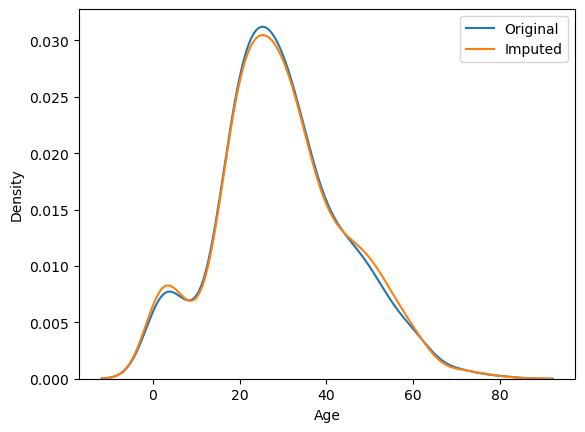

In [15]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label= 'Imputed')

plt.legend()
plt.show()

In [16]:
print('Original variable variance: ',X_train['Age'].var())
print('Variance after random imputation: ',X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  217.82351363880582


In [17]:
X_train[['Age','Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,52.231715
Age_imputed,210.251707,52.231715,217.823514


<Axes: >

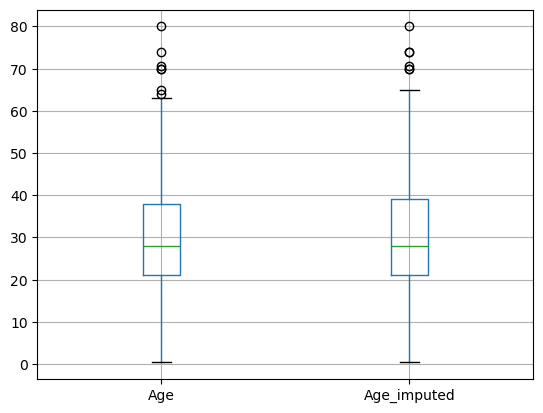

In [18]:
X_train[['Age','Age_imputed']].boxplot()

In [21]:
sample_value = X_train['Age'].dropna().sample(1,random_state = 42)

In [22]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [25]:
X= data
y= data['SalePrice']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [30]:
# For train data
null_count_train = X_train['GarageQual_imputed'].isnull().sum()
sampled_values_train = X_train['GarageQual'].dropna().sample(null_count_train, replace=True).values
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = sampled_values_train

# For test data
null_count_test = X_test['GarageQual_imputed'].isnull().sum()
sampled_values_test = X_train['GarageQual'].dropna().sample(null_count_test, replace=True).values
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = sampled_values_test

In [31]:
# For train data
null_count_train = X_train['FireplaceQu_imputed'].isnull().sum()
sampled_values_train = X_train['FireplaceQu'].dropna().sample(null_count_train, replace=True).values
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = sampled_values_train

# For test data
null_count_test = X_test['FireplaceQu_imputed'].isnull().sum()
sampled_values_test = X_train['FireplaceQu'].dropna().sample(null_count_test, replace=True).values
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = sampled_values_test

In [32]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts()/ len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts()/ len(X_train)
        ],
        axis=1)
temp.columns = ['original', 'imputed']

In [33]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts()/ len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() /len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.491143,0.639731
TA,0.405797,0.533109
Fa,0.043478,0.058361
Ex,0.033816,0.044893
Po,0.025765,0.034792


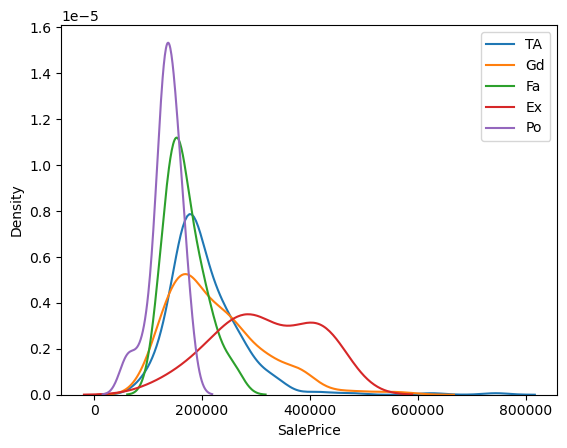

In [40]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

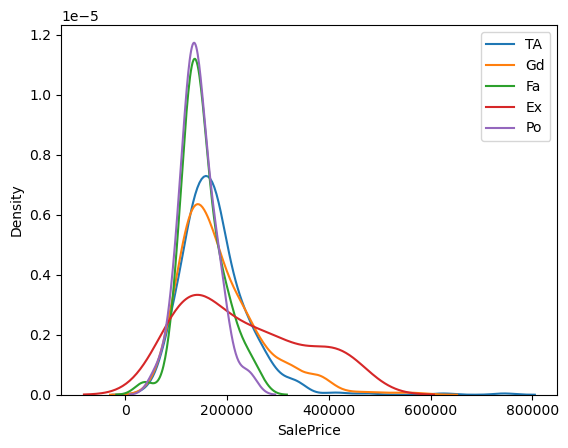

In [41]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()